<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords

In [29]:
rdf_cs = pd.read_csv('rdf_cs.csv')
rdf_cs

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Calculator,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carl_Sassenrath,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carroll_Morgan_(co...,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Cascading_Style_Sh...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Case-based_reasoning,computer_scientists
...,...,...,...,...
9142,http://dbpedia.org/resource/Jeff_Bezos,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Richard_Feynman,computer_scientists
9143,http://dbpedia.org/resource/Jeff_Bezos,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Richard_Serra,computer_scientists
9144,http://dbpedia.org/resource/Jeff_Bezos,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Rider_University,computer_scientists
9145,http://dbpedia.org/resource/Jeff_Bezos,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Robert_F._Goheen,computer_scientists


In [30]:
rdf_sculptor = pd.read_csv('rdf_sculptor.csv')
rdf_sculptor

,subject,predicate,object,category
0,http://dbpedia.org/resource/Aisa_Amittu,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Cady_Noland,sculptor
1,http://dbpedia.org/resource/Aisa_Amittu,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Camille_Billops,sculptor
2,http://dbpedia.org/resource/Aisa_Amittu,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Camille_Claudel,sculptor
3,http://dbpedia.org/resource/Aisa_Amittu,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Camille_Henrot,sculptor
4,http://dbpedia.org/resource/Aisa_Amittu,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carlo_Marochetti,sculptor
...,...,...,...,...
9140,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Beard_(artist),sculptor
9141,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Bellany,sculptor
9142,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lewis_Baumer,sculptor
9143,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lilian_Simpson,sculptor


In [31]:
rdf = pd.concat([rdf_cs, rdf_sculptor])
# save the dataframe to a csv file
rdf.to_csv('rdf.csv', index=False)
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Calculator,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carl_Sassenrath,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carroll_Morgan_(co...,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Cascading_Style_Sh...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Case-based_reasoning,computer_scientists
...,...,...,...,...
9140,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Beard_(artist),sculptor
9141,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Bellany,sculptor
9142,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lewis_Baumer,sculptor
9143,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lilian_Simpson,sculptor


In [2]:
rdf = pd.read_csv('rdf.csv')
rdf.tail()

,subject,predicate,object,category
18287,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Beard_(artist),sculptor
18288,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Bellany,sculptor
18289,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lewis_Baumer,sculptor
18290,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lilian_Simpson,sculptor
18291,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Linda_Kitson,sculptor


In [4]:
rdf.isna().sum()

subject      0
predicate    0
object       7
category     0
dtype: int64

In [33]:
rdf.dropna(inplace=True)
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Calculator,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carl_Sassenrath,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carroll_Morgan_(co...,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Cascading_Style_Sh...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Case-based_reasoning,computer_scientists
...,...,...,...,...
18287,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Beard_(artist),sculptor
18288,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Bellany,sculptor
18289,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lewis_Baumer,sculptor
18290,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lilian_Simpson,sculptor


In [35]:
rdf.drop_duplicates()
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Calculator,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carl_Sassenrath,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Carroll_Morgan_(co...,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Cascading_Style_Sh...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Case-based_reasoning,computer_scientists
...,...,...,...,...
18287,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Beard_(artist),sculptor
18288,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/John_Bellany,sculptor
18289,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lewis_Baumer,sculptor
18290,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageWikiLink,http://dbpedia.org/resource/Lilian_Simpson,sculptor


In [3]:
from rdflib import Graph, URIRef, Literal
import csv

In [4]:
# Convert the csv file to an RDF graph
def csv_to_rdf_graph(csv_file_path):
    graph = Graph()
    
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            subject = URIRef(row['subject'])
            predicate = URIRef(row['predicate'])
            obj = row['object']
            category = row['category']
            
            # Determine if the object is a URI or a literal and add to the graph
            if obj.startswith("http://") or obj.startswith("https://"):
                obj = URIRef(obj)
            elif obj.isdigit():
                obj = Literal(int(obj))
            else:
                try:
                    obj = Literal(float(obj))
                except ValueError:
                    obj = Literal(obj)
            
            graph.add((subject, predicate, obj))
    
    return graph

rdf_graph = csv_to_rdf_graph('rdf.csv')
print(rdf_graph.serialize(format='turtle'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://dbpedia.org/ontology/> .
@prefix ns2: <http://dbpedia.org/property/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .

<http://dbpedia.org/resource/Abhay_Bhushan> ns1:wikiPageWikiLink <http://dbpedia.org/resource/Bauer–Fike_theorem>,
        <http://dbpedia.org/resource/Bayesian_network>,
        <http://dbpedia.org/resource/Ben_Shneiderman>,
        <http://dbpedia.org/resource/Berkeley_Software_Distribution>,
        <http://dbpedia.org/resource/Bernard_Galler>,
        <http://dbpedia.org/resource/Bernhard_Schölkopf>,
        <http://dbpedia.org/resource/Bernhard_Thalheim>,
        <http://dbpedia.org/resource/Bert_Bos>,
        <http://dbpedia.org/resource/Bert_Sutherland>,
        <http://dbpedia.org/resource/Bertrand_Meyer>,
        <http://dbpedia.org/resource/Betty_Holberton>,
        <http://dbpedia.org/resource/Bigtable>,
        <http://dbpedia.org/resource/Bill_Gates>,
        <http://dbpedia.org/resource/Bi

In [5]:
from collections import Counter
import re

In [6]:
def get_local_name(uri):

    # Extracts the local name from a URI. Local is the part after the last # or the last /
    return uri.split('/')[-1].split('#')[-1]

results = []
for subj, pred, obj in rdf_graph:
    # Get the local name of the subject, predicate, and object
    if isinstance(subj, URIRef):
        subj_local_name = get_local_name(str(subj))
    else:
        subj_local_name = str(subj)
    
    if isinstance(pred, URIRef):
        pred_local_name = get_local_name(str(pred))
    else:
        pred_local_name = str(pred)
    
    if isinstance(obj, URIRef):
        obj_local_name = get_local_name(str(obj))
    else:
        obj_local_name = str(obj)
    
    results.append({"Subject": subj_local_name, "Predicate": pred_local_name, "Object": obj_local_name})
    
df = pd.DataFrame(results)  

# Remove names of the sculptors and computer scientists from the object column
with open('names.txt', 'r') as f:
    names = f.read().splitlines()

pattern = re.compile('|'.join(map(re.escape, names)))
df['Object'] = df['Object'].apply(lambda x: pattern.sub('', x))
df.to_csv('rdf_cleaned.csv', index=False)
df.head()


,Subject,Predicate,Object
0,Jeff_Bonwick,wikiPageWikiLink,Program_optimization
1,Rod_Brooks,wikiPageWikiLink,Moore_machine
2,Leonard_Adleman,wikiPageWikiLink,Hulk_(film)
3,John_Armleder,wikiPageWikiLink,Kunstmuseum_Den_Haag
4,Tracy_Camp,wikiPageWikiLink,Eldon_C._Hall


In [7]:
from urllib.parse import quote
from wordcloud import WordCloud
from collections import Counter

In [16]:
def display_wordcloud(dataframe):
    # display wordcloud
    # Join the cleaned object column into a single string
    all_words = ' '.join(dataframe['Object'])
    print(all_words)
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    return wordcloud

Program_optimization Moore_machine Hulk_(film) Kunstmuseum_Den_Haag Eldon_C._Hall Machine_Translation Algorithm NASA Febronia_of_Nisibis Category:Neighborhoods_in_Brooklyn Process_mining Antiquarian Prime_Minister_of_France Caroline_Peddle_Ball Andrew_Spence_(artist) Bohdan_A._Futey Informatics_Forum Bolshevik Hou_Kok_Chung Category:Poststructuralists John_William_Strutt,_3rd_Baron_Rayleigh On_Lisp Antony_Gormley Lucy_Qinnuayuak Axel_Salto Ontology_(information_science) Category:20th-century_Spanish_women_artists Barbara_Yung Samir_Das Josette_Hébert-Coëffin Beatrice_Angle David_Smith_(sculptor) The_Turing_Guide Robert_Tarjan Stefano_Arienti Osama_Hajjaj Melinda_A._Zeder Valencia,_Spain File:Necropolis_to_the_victims_of_Fascism_Novi_Travnik.jpg David_Canfield_Smith Bert_Bos Rolando_Castellón Italy Savonarola Anderiesen Economics Program_optimization Product_(business) Modena MOMus–Thessaloniki_Museum_of_Photography Carolyn_Parker Bauer–Fike_theorem Strongly_connected_component Crimean_

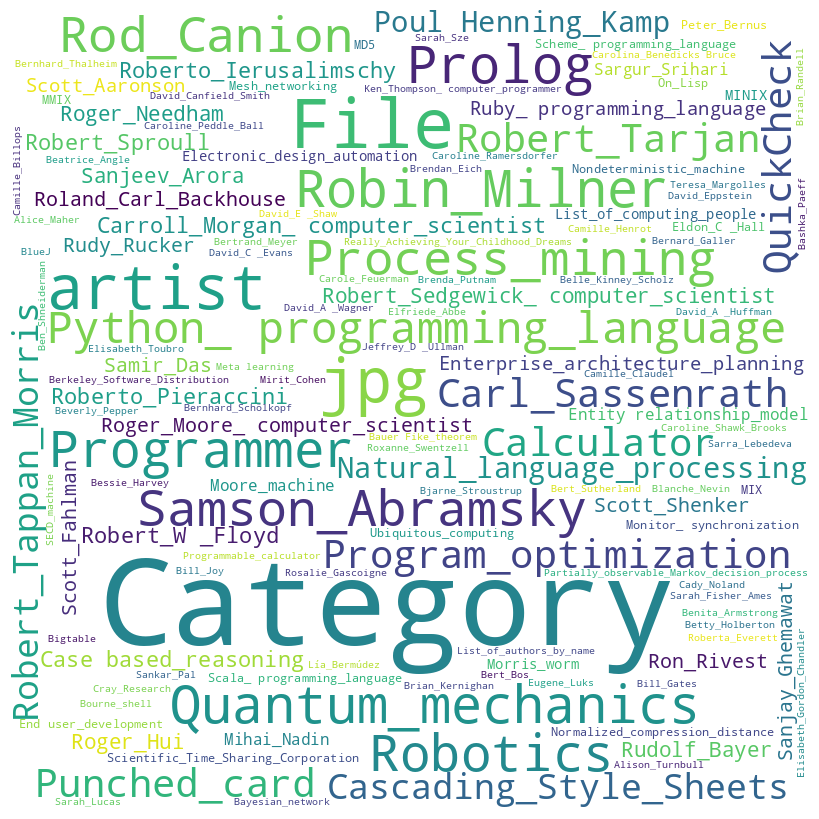

In [9]:
wordcloud = display_wordcloud(df)

### Clustering

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df['Object']

In [12]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=200,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=nltk.word_tokenize,
                                       ngram_range=(1, 1))
X_train_matrix = vectorizer.fit_transform(X_train)
X_test_matrix = vectorizer.transform(X_test)

print(X_test_matrix.shape)



/home/oumar/Projects/UE-803/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3631, 200)


In [135]:
vectorizer.get_feature_names_out()

array(['&', '(', ')', ',', '.', ':', '_california', 'alice_maher',
       'alison_turnbull', 'allen_hutchinson', 'ambrosius_petruzzy',
       'american_football', 'anna_dabis', 'anna_golubkina', 'architect',
       'artist', 'astrology', 'baseball', 'bashka_paeff',
       'bauer–fike_theorem', 'bayesian_network', 'beatrice_angle',
       'beatrice_huntington', 'belle_kinney_scholz', 'ben_enwonwu',
       'ben_shneiderman', 'benedetto_antelami', 'benedetto_da_maiano',
       'benita_armstrong', 'berkeley_software_distribution',
       'bernard_galler', 'bernhard_schölkopf', 'bernhard_thalheim',
       'bert_bos', 'bert_sutherland', 'bertrand_meyer', 'bessie_harvey',
       'bessie_potter_vonnoh', 'betty_holberton', 'betty_jukes',
       'beverly_pepper', 'bharti_kher', 'bigtable', 'bill_barrett_',
       'bill_gates', 'bill_joy', 'bill_woodrow', 'bjarne_stroustrup',
       'blanche_nevin', 'bluej', 'bourne_shell', 'brenda_putnam',
       'brendan_eich', 'brian_kernighan', 'brian_randell

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)

km.fit(X_train_matrix)
predicted_clusters = km.predict(X_test_matrix)

# Initialize the PCA object
pca = PCA(n_components=2)


# Reduce the dimensionality of the test data to 2D
X_test_matrix_2d = pca.fit_transform(X_test_matrix)
# X_train_matrix_2d = pca.fit_transform(X_train_matrix)




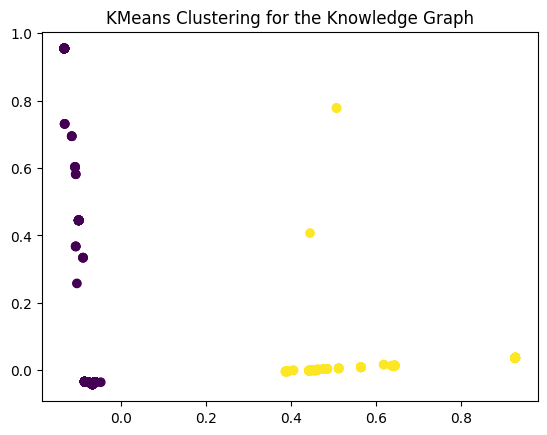

In [15]:
plt.scatter(X_test_matrix_2d[:, 0], X_test_matrix_2d[:, 1], c=predicted_clusters)
plt.title("KMeans Clustering for the Knowledge Graph")
plt.show()